In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-business-rankings-2020/Top250.csv
/kaggle/input/restaurant-business-rankings-2020/Future50.csv
/kaggle/input/restaurant-business-rankings-2020/Independence100.csv


In [2]:
# Importing any additional libraries that may be useful

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [3]:
# Reading in the data
df = pd.read_csv("../input/restaurant-business-rankings-2020/Top250.csv")

In [4]:
# Viewing the data
df.head(10)

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
5,6,Subway,NaN,10200,-2.0%,23801,-4.0%,NaN,Quick Service & Sandwich
6,7,Wendy's,NaN,9762,4.2%,5852,0.7%,NaN,Quick Service & Burger
7,8,Dunkin',"Dunkin' dropped ""Donuts"" from its name and rep...",9228,5.0%,9630,2.2%,NaN,Quick Service & Coffee Cafe
8,9,Domino's,NaN,7044,6.9%,6126,4.3%,NaN,Quick Service & Pizza
9,10,Panera Bread,NaN,5890,4.0%,2160,3.2%,NaN,Fast Casual & Bakery Cafe


In [5]:
# Looking for missing data using for loops
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# Seems to be that 'Content' and 'Headquarters' are missing data
# Upon reviewing, the missing data is not pertinent to the analysis

Rank - 0%
Restaurant - 0%
Content - 87%
Sales - 0%
YOY_Sales - 0%
Units - 0%
YOY_Units - 0%
Headquarters - 79%
Segment_Category - 0%


In [6]:
# Data Types for our columns

print(df.dtypes)

Rank                 int64
Restaurant          object
Content             object
Sales                int64
YOY_Sales           object
Units                int64
YOY_Units           object
Headquarters        object
Segment_Category    object
dtype: object


In [7]:
# Continuously cleaning data before analysis

df.drop_duplicates()


,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger


Text(0, 0.5, 'Rank')

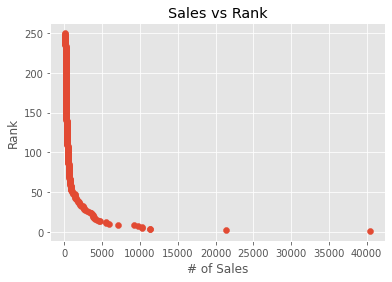

In [8]:
plt.scatter(x = df['Sales'], y = df['Rank'])
plt.show

plt.title('Sales vs Rank')
plt.xlabel('# of Sales')
plt.ylabel('Rank')
# Obvious correlation between 'Sales' and 'Rank'
# Curious to look for other correlation between other variables. 

Text(0, 0.5, 'Units')

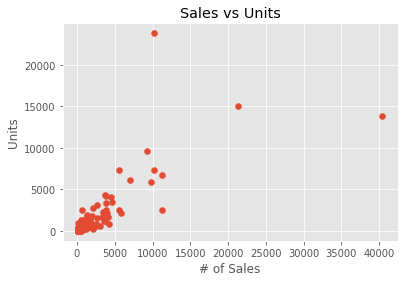

In [9]:
plt.scatter(x = df['Sales'], y = df['Units'])
plt.show

plt.title('Sales vs Units')
plt.xlabel('# of Sales')
plt.ylabel('Units')

# Units relating to the amount of locations that specific restaurant actively has
# Some outliers represeted but generally seems like a positive correlation

<AxesSubplot:xlabel='Sales', ylabel='Units'>

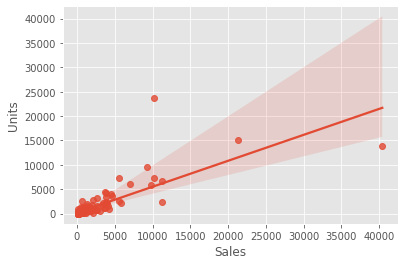

In [10]:
# Quick glance at correlation between 'Sales' and 'Units'

sns.regplot(x="Sales", y="Units", data=df)


In [11]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,Rank,Sales,Units
Rank,1.000000,-0.462349,-0.450929
Sales,-0.462349,1.000000,0.780101
Units,-0.450929,0.780101,1.000000


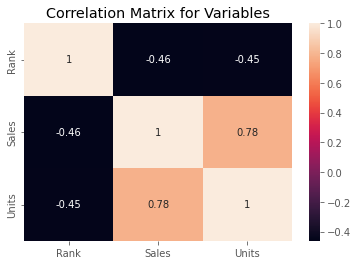

In [12]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Variables")


plt.show()

# Easier way to visualize correlations between 
# numeric values within the dataset.